<a href="https://colab.research.google.com/github/maninipattnayak/CS_65_W_Loan_Prediction/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Loan Approval Prediction Model**
**Author**: Manini Pattnayak

**Use Case**: For financial institutions to know the likelyhood of loan default to minimize credit risk.

**Project Overview**: In this project, we will classify loan applications as approved or declined using Logistic Regression. We need data about loan applications to understand what factors can lead to approval or rejection.

We will use dataset from [Kaggle](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset)

**Column Reference from dataset**

* Loan_ID:- represents the loan identification number
*Gender:- whether the applicant is male or female
*Married:- the marital status of the applicant
*Dependents:- the number of dependents the applicant has
*Education:- whether the applicant is graduate or not
*Self_employed:- whether the applicanat is self-employed or not
*Applicant_Income:- the income of the loan applicant
*Coapplicant_Income:- the income of the coapplicant of loan
*Loan_Amount:- the amount of loan applied for
*Loan_Amount_Term:- the duration of the loan
*Credit_History:- the credit history of the loan applicant
*Property_Area:- type of property given as collateral
*Loan_Status:- whether loan application was approved or rejected

**Objective**: The model will use the various parameters of loan applications and classify the loan as 1 - approved or 0 - rejected

**Data Source**: Download the file from this LINK - Full dataset csv filesize is 493MB and has 6.36 million records.


#Import libraries and upload the data
Import pandas, matplotlib, seaborn and sklearn libraries to be used in the project and create url for the data to be analysed

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

url = 'https://raw.githubusercontent.com/maninipattnayak/CS_65_W_Loan_Prediction/main/loan_prediction.csv'
df = pd.read_csv(url)

#Cleaning the data

Fixing the column headings to make it coherent

In [3]:
def fix_col(col):
  updated_col = ""
  for i in range(len(col)):
    char = col[i]
    if(i == 0):
      updated_col += char
    else:
      prev_char =col[i-1]
      if char.isupper() and prev_char != "_":
        updated_col += "_" + char
      else:
        updated_col += char
  return updated_col

Renaming the columns

In [4]:
def fix_columns(df):
  for col in df.columns:
    if col != "Loan_ID":
      df=df.rename(columns={col:fix_col(col)})
  return df

Checking for missing values in the data

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Filling missing values with mean for Loan Amount and mode for all other columns

In [6]:
def missing_val(df):
  df.Gender.fillna(df.Gender.mode()[0],inplace=True)
  df.Married.fillna(df.Married.mode()[0],inplace=True)
  df.Dependents.fillna(df.Dependents.mode()[0],inplace=True)
  df.Self_Employed.fillna(df.Self_Employed.mode()[0],inplace=True)
  df.Loan_Amount.fillna(df.Loan_Amount.mean(),inplace=True)
  df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mode()[0],inplace=True)
  df.Credit_History.fillna(df.Credit_History.mode()[0],inplace=True)
  return df

Defining clean_data function

In [7]:
def clean_data(df):
    d1=fix_columns(df)
    d2=missing_val(d1)
    return d2

Clean data is saved in variable df1

In [8]:
df1=clean_data(df)

Checking for missing values after cleaning the data

In [9]:
df1.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Final output after cleaning the data

In [10]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


#Exploratory Analysis

Used spearman method to check correlation between columns with numeric values

The strongest correlation is between Loan_Amount and Applicant_Income. A higher income indicates that the applicant is more financially stable and has a higher ability to repay the loan.

What is surprising is the negative correlation between Credit_History and Loan_Amount. The reason could be that the interest charged to applicants with good credit history is lower than to applicants with poor credit history. However risky, the interest earning is better in case of applicants with poor credit history.

In [11]:
df1.corr(method='spearman').style.background_gradient(cmap='RdBu')

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
Applicant_Income,1.000000,-0.320056,0.502740,-0.040292,0.037180
Coapplicant_Income,-0.320056,1.000000,0.231078,-0.012435,0.001271
Loan_Amount,0.502740,0.231078,1.000000,0.034869,-0.001122
Loan_Amount_Term,-0.040292,-0.012435,0.034869,1.000000,0.007093
Credit_History,0.037180,0.001271,-0.001122,0.007093,1.000000


Used bar plot to visualize relation between the categorical data and loan status

From the results, the following inferences can be made.
* Number of male applicants is greater than number of female applicants and in both cases the number of approved loans is almost double of loans rejected.
*Married applicants have a higher chance of getting their loans approved.
*Applicants with zero dependents had maximum loan approvals.
*Education is also an important parameter as graduate applicants are more likely to get their loan approved.
*Applicants who are self employed are less likely to get a loan as their income might not be as stable as other applicants.
*I was expecting applicants with urban properties to get maximum loan approvals, however, in this data, the maximum approvals are for applicants with semi-urban properties. It might be because of the other parameters involved.


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

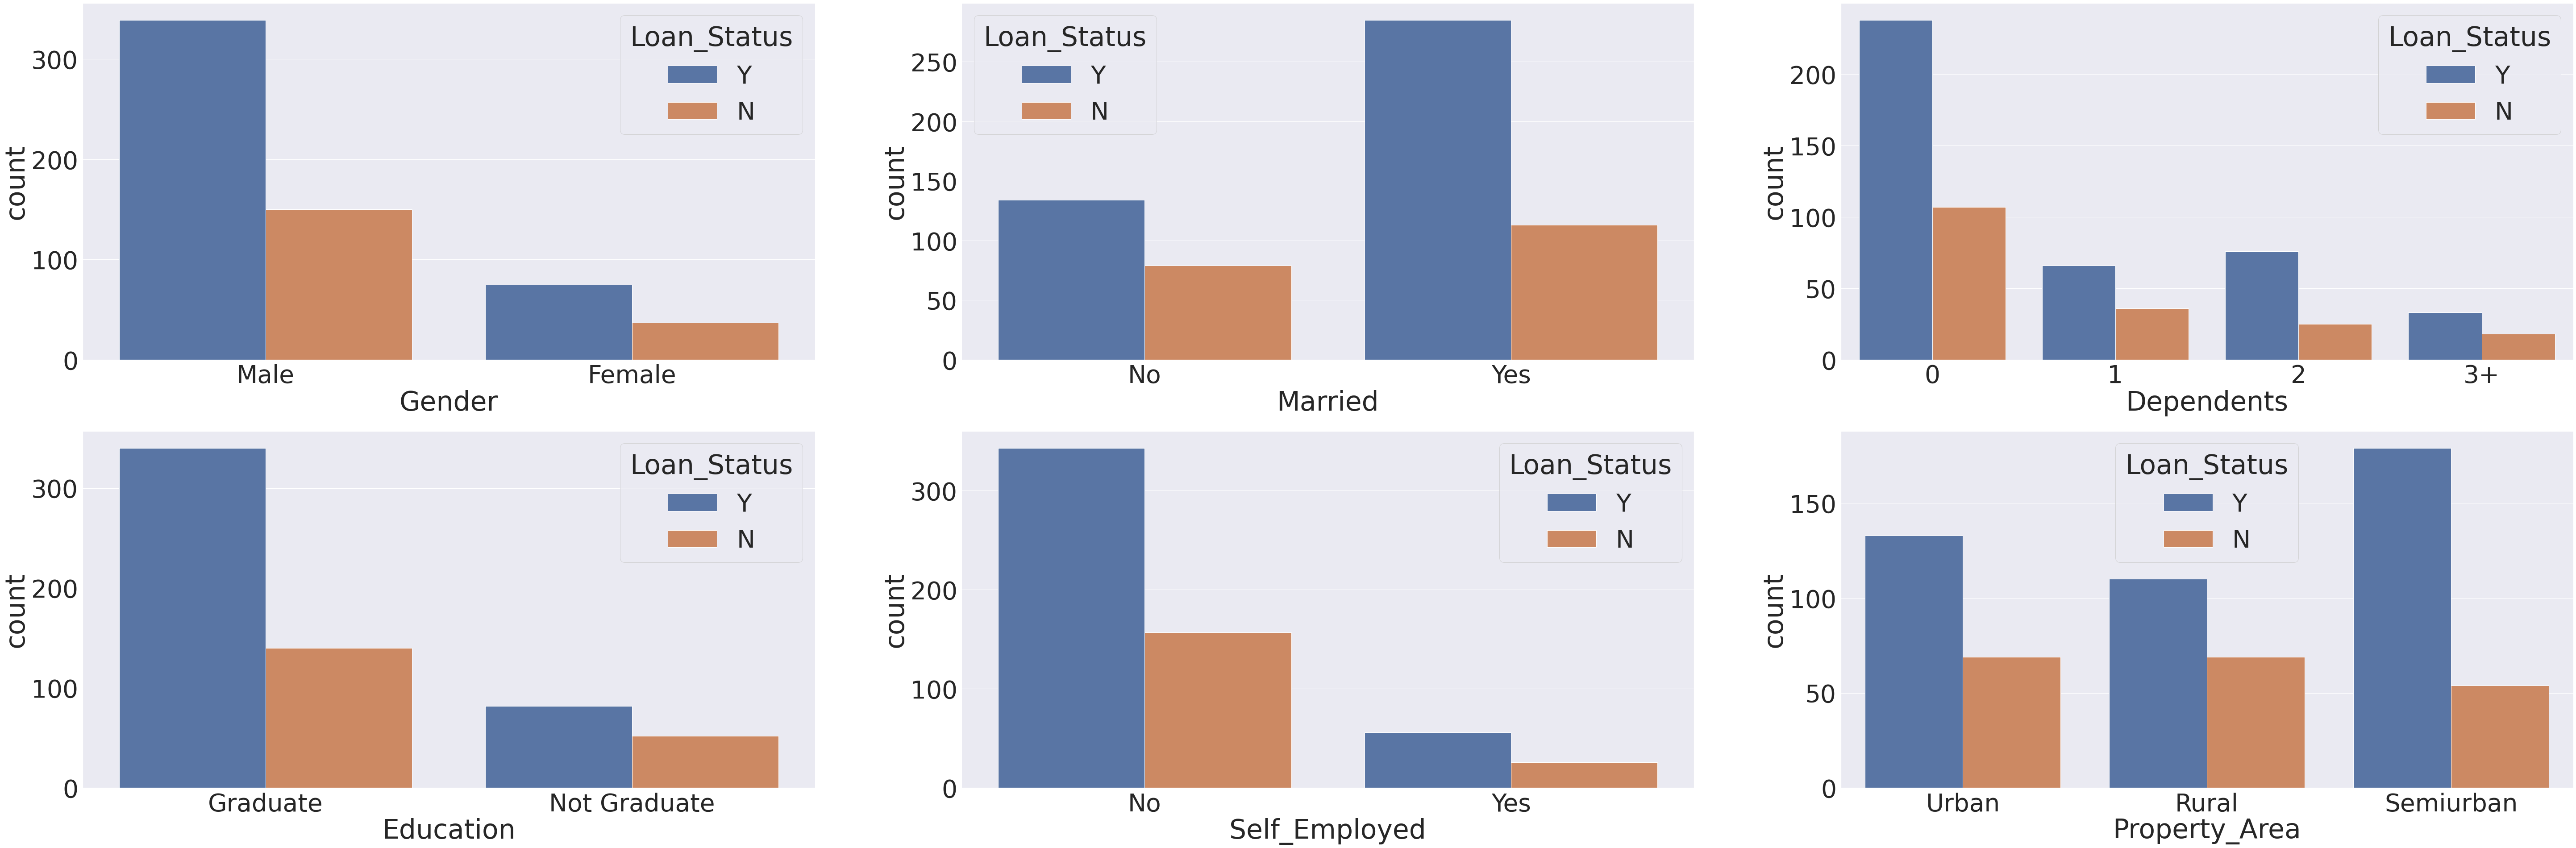

In [12]:
plt.figure(figsize=(100, 50))
sns.set(font_scale=5)
plt.subplot(331)
sns.countplot(x=df.Gender,hue=df.Loan_Status)
plt.subplot(332)
sns.countplot(x=df.Married,hue=df.Loan_Status)
plt.subplot(333)
sns.countplot(x=df.Dependents,hue=df.Loan_Status)
plt.subplot(334)
sns.countplot(x=df.Education,hue=df.Loan_Status)
plt.subplot(335)
sns.countplot(x=df.Self_Employed,hue=df.Loan_Status)
plt.subplot(336)
sns.countplot(x=df.Property_Area,hue=df.Loan_Status)

#Preparing the data for Logistic Regression

Since LR doesn't accept categorical data, hence, changing categorical data to numeric data.

In [13]:
def replace_loan_status_col(col):
  return (col.replace('Y',1).replace('N',0))

def replace_pa_col(col):
  return (col.replace('Rural',0).replace('Semiurban',1).replace('Urban',2))

def replace_education_col(col):
  return (col.replace('Not Graduate',0).replace('Graduate',1))

def replace_married_col(col):
  return (col.replace('Yes',1).replace('No',0))

def replace_dep_col(col):
  return (col.replace('3+',3).replace('2',2).replace('1',1).replace('0',0))

def replace_emp_col(col):
  return (col.replace('Yes',1).replace('No',0))

def replace_gender_col(col):
  return (col.replace('Male',1).replace('Female',0))

In [14]:
df2 = df1.assign(
    Loan_Status=replace_loan_status_col(df1['Loan_Status']),
    Property_Area=replace_pa_col(df1['Property_Area']),
    Education=replace_education_col(df1['Education']),
    Married=replace_married_col(df1['Married']),
    Dependents=replace_dep_col(df1['Dependents']),
    Self_Employed=replace_emp_col(df1['Self_Employed']),
    Gender=replace_gender_col(df1['Gender']),
)

Final data frame for Logistic Regression

In [15]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


Correlation matrix for all parameters involved in decision making. As expected, credit history and loan status have the highest correlation.

In [16]:
df2.corr(method='spearman').style.background_gradient(cmap='RdBu')

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.168293,-0.045364,-0.000525,0.074391,0.207607,0.158053,-0.086480,0.009170,-0.023914,0.017987
Married,0.364569,1.000000,0.352516,-0.012304,0.004489,0.009276,0.269111,0.191964,-0.119930,0.010938,0.004155,0.091478
Dependents,0.168293,0.352516,1.000000,-0.048604,0.072552,0.140667,-0.037838,0.150482,-0.121601,-0.031723,0.021655,0.008982
Education,-0.045364,-0.012304,-0.048604,1.000000,0.010383,0.189536,0.011973,0.160953,0.070937,0.073658,0.064534,0.085884
Self_Employed,-0.000525,0.004489,0.072552,0.010383,1.000000,0.197866,-0.064544,0.112503,-0.041449,-0.001550,-0.030983,-0.003700
Applicant_Income,0.074391,0.009276,0.140667,0.189536,0.197866,1.000000,-0.320056,0.502740,-0.040292,0.037180,-0.067188,-0.004162
Coapplicant_Income,0.207607,0.269111,-0.037838,0.011973,-0.064544,-0.320056,1.000000,0.231078,-0.012435,0.001271,-0.075993,0.034960
Loan_Amount,0.158053,0.191964,0.150482,0.160953,0.112503,0.502740,0.231078,1.000000,0.034869,-0.001122,-0.101278,-0.043441
Loan_Amount_Term,-0.086480,-0.119930,-0.121601,0.070937,-0.041449,-0.040292,-0.012435,0.034869,1.000000,0.007093,-0.061441,-0.027664
Credit_History,0.009170,0.010938,-0.031723,0.073658,-0.001550,0.037180,0.001271,-0.001122,0.007093,1.000000,0.001360,0.540556


Splitting data into train data and test data in the ratio of 8:2

The x-axis of train data contains all parameters (independent variables) excluding the loan_id and loan status and the y-axis contains the loan status(dependent variable).

In [17]:
x = df2.iloc[1:614,1:12].values
y = df2.iloc[1:614,12].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

#Logistic Regression

* Creating an instance of logistic regression model
*Fitting model to the training data
*Using fitted model to predict the target variable for the test data(x-test) and store the predictions in variable lr_pred
*The accuracy of the logistic regression model, by comparing predicted values(lr_pred) with actual values in test data(y_test), comes out to be 79.67%


In [18]:
model = LogisticRegression()
model.fit(x_train, y_train)

lr_pred = model.predict(x_test)
print('LR accuracy = ', metrics.accuracy_score(lr_pred,y_test))

LR accuracy =  0.7967479674796748


Predicted values vs Actual Values

In [24]:
print("Predicted",lr_pred,"\n","Actual",y_test)

Predicted [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 1 1 0 1 1 1 1] 
 Actual [1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1
 1 0 1 0 1 1 0 0 1 1 1 1]


Generating classification report for further analysis

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.88      0.39      0.55        38
           1       0.78      0.98      0.87        85

    accuracy                           0.80       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.81      0.80      0.77       123

